In [1]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import csv
import joblib
from sklearn.linear_model import LinearRegression
import ast

# Initialize PolynomialFeatures
poly = PolynomialFeatures(degree=2, include_bias=True)

# Read CSV data
with open('calib_10xPonto/calib6/calibration10x_file17.csv', newline='') as f:
    reader = csv.reader(f)
    data = list(reader)

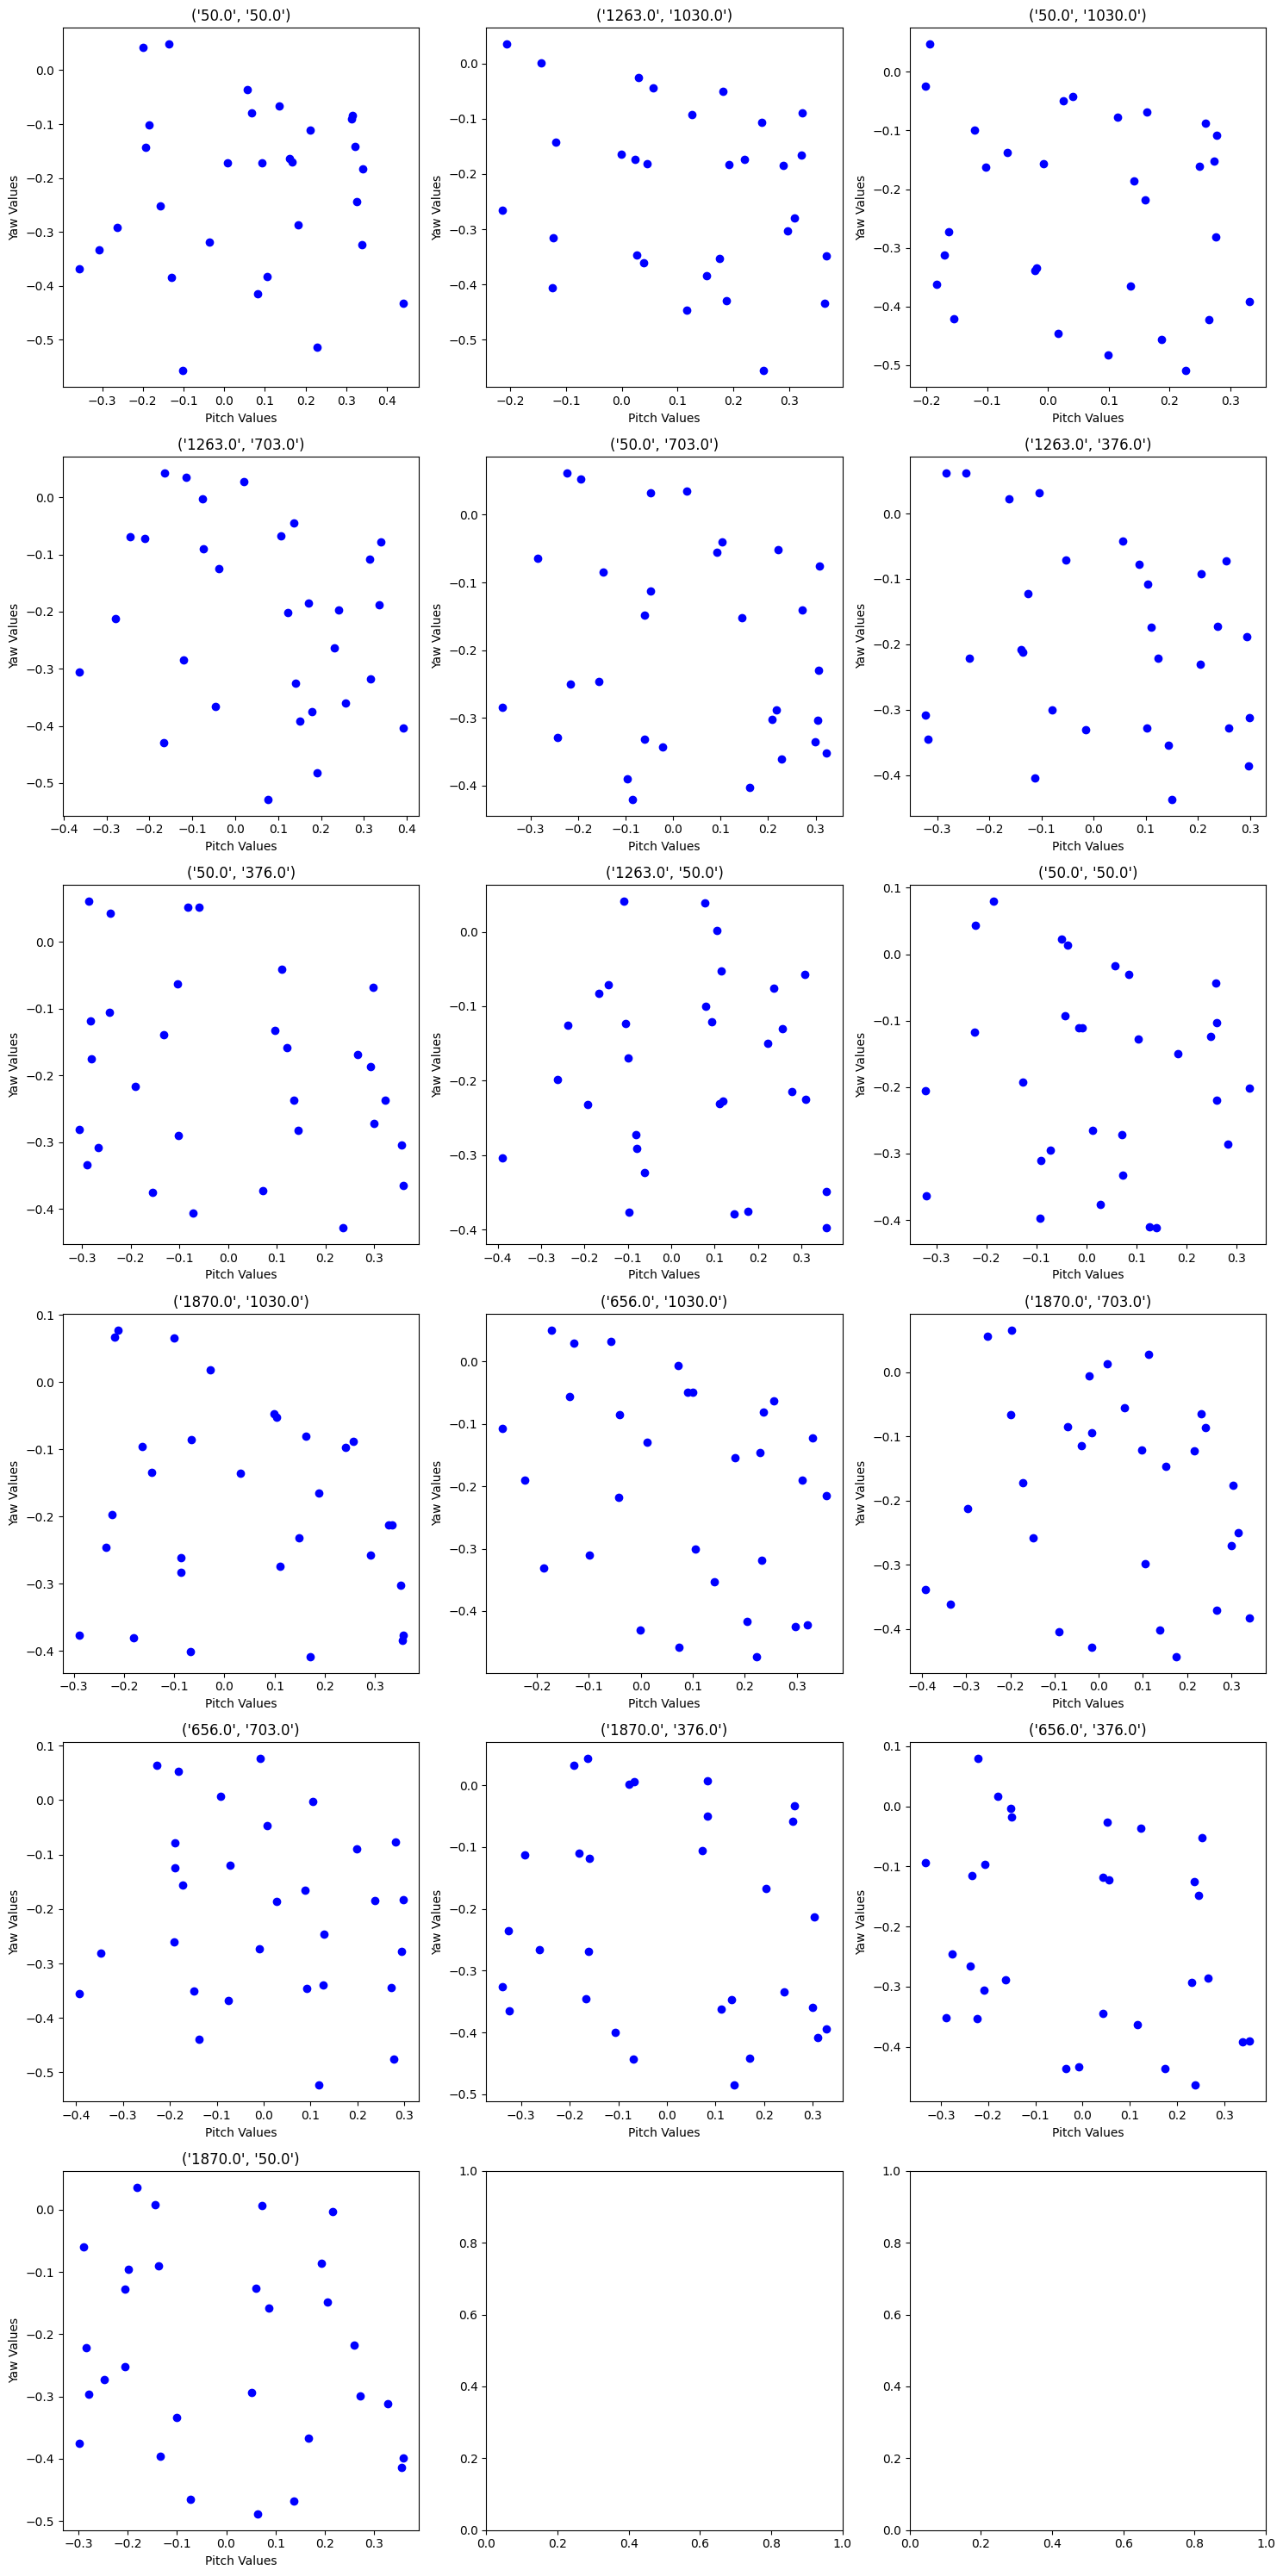

In [2]:
import matplotlib.pyplot as plt

# Definir o número de pontos por subplot
points_per_plot = 30  # Você pode alterar esse valor para o número desejado

# Número de linhas necessárias para plotar todos os subconjuntos em uma grade com 3 colunas
rows = (len(data) + points_per_plot - 1) // points_per_plot // 3 + 1

aux = 0
# Criar uma figura com subplots
fig, axes = plt.subplots(rows, 3, figsize=(15, rows*5))

# Plotando todos os subconjuntos de dados necessários
for index, ax in enumerate(axes.flatten()):
    if index * points_per_plot < len(data):
        # Definir o subconjunto de dados a ser plotado
        info = data[index*points_per_plot:(index+1)*points_per_plot]

        # Extrair os pontos de dados relevantes para plotar
        x_values = [float(point[0]) for point in info]
        y_values = [float(point[1]) for point in info]

        # Plotar os pontos
        ax.scatter(x_values, y_values, marker='o', color='blue')

        # Definir rótulos e título
        ax.set(xlabel='Pitch Values', ylabel='Yaw Values', title=f'{data[aux][2], data[aux][3]}')
        aux += points_per_plot

# Ajustar layout para evitar sobreposição
plt.tight_layout()

# Mostrar o plot
plt.show()




In [11]:
data_floats = [[ast.literal_eval(sublist) for sublist in group] for group in data]
coord_x = [d[2] for d in data]
coord_y = [d[3] for d in data]
coord_x = list(map(int, map(float, coord_x)))  
coord_y = list(map(int, map(float, coord_y)))  
pitch_yaw = [(d[0], d[1]) for d in data_floats]

print(coord_x)
print(coord_y)
print(pitch_yaw)


[50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 656, 656, 656, 656, 656, 656, 656, 656, 656, 656, 1263, 1263, 1263, 1263, 1263, 1263, 1263, 1263, 1263, 1263, 1870, 1870, 1870, 1870, 1870, 1870, 1870, 1870, 1870, 1870, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 656, 656, 656, 656, 656, 656, 656, 656, 656, 656, 1263, 1263, 1263, 1263, 1263, 1263, 1263, 1263, 1263, 1263, 1870, 1870, 1870, 1870, 1870, 1870, 1870, 1870, 1870, 1870, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 656, 656, 656, 656, 656, 656, 656, 656, 656, 656, 1263, 1263, 1263, 1263, 1263, 1263, 1263, 1263, 1263, 1263, 1870, 1870, 1870, 1870, 1870, 1870, 1870, 1870, 1870, 1870, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 656, 656, 656, 656, 656, 656, 656, 656, 656, 656, 1263, 1263, 1263, 1263, 1263, 1263, 1263, 1263, 1263, 1263, 1870, 1870, 1870, 1870, 1870, 1870, 1870, 1870, 1870, 1870]
[50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50

In [12]:
poly_features = []

for py in pitch_yaw:
    py = np.array(py)
    py = py.reshape(1, -1)
    poly_features.append(poly.fit_transform(py))


poly_features = np.array(poly_features)

print(len(poly_features))
print(poly_features.shape)
print(poly_features)

160
(160, 1, 6)
[[[ 1.00000000e+00 -3.98818170e-01  1.97749600e-02  1.59055933e-01
   -7.88661336e-03  3.91049043e-04]]

 [[ 1.00000000e+00 -4.32633900e-01 -1.62525140e-03  1.87172091e-01
    7.03138852e-04  2.64144211e-06]]

 [[ 1.00000000e+00 -4.33280170e-01  8.02446600e-03  1.87731706e-01
   -3.47684199e-03  6.43920546e-05]]

 [[ 1.00000000e+00 -3.73942460e-01  2.67788470e-03  1.39832963e-01
   -1.00137479e-03  7.17106647e-06]]

 [[ 1.00000000e+00 -2.26015050e-01  1.18209360e-02  5.10828028e-02
   -2.67170944e-03  1.39734528e-04]]

 [[ 1.00000000e+00 -3.26827500e-01 -1.67060500e-02  1.06816215e-01
    5.45999656e-03  2.79092107e-04]]

 [[ 1.00000000e+00 -2.38851310e-01 -1.38797200e-02  5.70499483e-02
    3.31518930e-03  1.92646627e-04]]

 [[ 1.00000000e+00 -3.42535730e-01 -1.01144190e-02  1.17330726e-01
    3.46454990e-03  1.02301472e-04]]

 [[ 1.00000000e+00 -3.95227940e-01  1.44628600e-04  1.56205125e-01
   -5.71612636e-05  2.09174319e-08]]

 [[ 1.00000000e+00 -4.06085900e-01 -4.9

In [13]:
#print(poly_features[0][0])
poly_features2 = []
for p in poly_features:
    poly_features2.append(p[0])

In [14]:
Xx_train, Xx_test, Xy_train, Xy_test = train_test_split(poly_features2, coord_x, test_size=0.2)
Yx_train, Yx_test, Yy_train, Yy_test = train_test_split(poly_features2, coord_y, test_size=0.2)

In [15]:
model_x = RandomForestRegressor(max_depth=2)
model_y = RandomForestRegressor(max_depth=2)

model_x.fit(Xx_train, Xy_train)
model_y.fit(Yx_train, Yy_train)

x_pred = model_x.predict(Xx_test)
y_pred = model_y.predict(Yx_test)

mse_x = mean_squared_error(Xy_test, x_pred)
mse_y = mean_squared_error(Yy_test, y_pred)

print()
print("Ground Truth for X: ", Xy_test)
print("Predictions for X:", x_pred)
print()
print("Ground Truth for Y: ", Yy_test)
print("Predictions for Y:", y_pred)
print()

print("Mean Squared Error for X:", mse_x)
print("Mean Squared Error for Y:", mse_y)


Ground Truth for X:  [656, 50, 50, 50, 1870, 656, 656, 50, 1870, 656, 50, 1263, 50, 1870, 1870, 50, 50, 1263, 1870, 50, 1263, 50, 1870, 1263, 50, 656, 1870, 656, 1870, 1263, 1870, 1870]
Predictions for X: [ 537.20239842  463.7786452   537.20239842  537.20239842 1600.52660173
  320.78523783  537.20239842  132.35318703 1600.52660173  537.20239842
   84.14902452 1228.58949661  615.06759205 1802.59536191 1600.52660173
  132.35318703   84.14902452 1228.58949661 1228.58949661   84.14902452
 1228.58949661   84.14902452 1802.59536191 1228.58949661  178.7000447
  537.20239842 1802.59536191  537.20239842 1802.59536191 1228.58949661
 1600.52660173 1802.59536191]

Ground Truth for Y:  [50, 703, 376, 1030, 376, 50, 50, 703, 50, 1030, 50, 50, 1030, 703, 703, 376, 703, 376, 1030, 376, 703, 703, 376, 50, 703, 703, 703, 703, 50, 1030, 50, 50]
Predictions for Y: [ 101.66010625 1019.10664315  439.10220348 1021.26717887  433.77828191
  101.66010625  101.66010625  825.85152947  101.66010625  844.72494922


In [15]:
joblib.dump(model_x, 'model_x_linear_morePitch-27.02.pkl')  # Save model_x
joblib.dump(model_y, 'model_y_linear_morePitch-27.02.pkl')  # Save model_y

['model_y_linear_morePitch-27.02.pkl']

In [16]:
model_x = LinearRegression()
model_y = LinearRegression()

model_x.fit(Xx_train, Xy_train)
model_y.fit(Yx_train, Yy_train)

x_pred = model_x.predict(Xx_test)
y_pred = model_y.predict(Yx_test)

mse_x = mean_squared_error(Xy_test, x_pred)
mse_y = mean_squared_error(Yy_test, y_pred)

print()
print("Ground Truth for X: ", Xy_test)
print("Predictions for X:", x_pred)
print()
print("Ground Truth for Y: ", Yy_test)
print("Predictions for Y:", y_pred)
print()

print("Mean Squared Error for X:", mse_x)
print("Mean Squared Error for Y:", mse_y)


Ground Truth for X:  [656, 50, 50, 50, 1870, 656, 656, 50, 1870, 656, 50, 1263, 50, 1870, 1870, 50, 50, 1263, 1870, 50, 1263, 50, 1870, 1263, 50, 656, 1870, 656, 1870, 1263, 1870, 1870]
Predictions for X: [ 748.84497301  416.4902332   619.46514724  570.94916959 1598.67024372
  444.65842963  777.15283791  187.73696109 1677.10940457  683.41498264
 -132.20606698 1297.73450677  883.56679229 1673.52137966 1639.84685964
  306.46618175  118.50312792 1068.8331231  1241.06001418 -194.36868342
 1199.39427175  251.43442688 1829.04524292 1227.64525072  312.43361137
  445.40765642 1840.86272353  687.27498289 2099.56504808 1002.23066338
 1621.64473656 1672.5386625 ]

Ground Truth for Y:  [50, 703, 376, 1030, 376, 50, 50, 703, 50, 1030, 50, 50, 1030, 703, 703, 376, 703, 376, 1030, 376, 703, 703, 376, 50, 703, 703, 703, 703, 50, 1030, 50, 50]
Predictions for Y: [  54.06261466  892.5659777   289.30174369  957.27987048  231.07157319
  101.27449266   36.19614921  829.97338829   -2.9539643   938.82768199